In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_to_load = pd.read_csv('../Pyber/data/city_data.csv')
city_data_to_load.head()
ride_data_to_load = pd.read_csv('../Pyber/data/ride_data.csv')
ride_data_to_load.head()
# Combine the data into a single dataset
Pyber_df = pd.merge(city_data_to_load, ride_data_to_load, how="left", on=["city", "city"])
# Display the data table for preview
Pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
Pyber_df = Pyber_df.rename(columns={"city" : "City", "date" : "Date", "fare" : "Fare", "ride_id" : "Ride ID", "driver_count" : "Driver Count", "type" : "Type"
})
Pyber_df.head()

,City,Driver Count,Type,Date,Fare,Ride ID
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [4]:
#group be city name
by_city = Pyber_df.groupby('City')

# var holding total fares by city
total_fares = by_city.sum()['Fare']

# var holding avg fare by city
avg_fare = by_city.mean()['Fare']

#var holding rides by city
ride_count = by_city['Ride ID'].count()

# num of drivers
driver_count = by_city.mean()['Driver Count']

# city type data
city_type = city_data_to_load.set_index('city')['type']

# dataframe from above series
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Total Fares": total_fares,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type})


city_info.sort_values('Number of Drivers', ascending = False)


,Number of Rides,Total Fares,Average Fare,Number of Drivers,Type of City
West Samuelburgh,25,544.19,21.767600,73.0,Urban
South Michelleport,31,758.00,24.451613,72.0,Urban
West Anthony,30,742.10,24.736667,70.0,Urban
Liumouth,33,862.95,26.150000,69.0,Urban
Port Angela,19,452.90,23.836842,67.0,Urban
Reynoldsfurt,19,416.47,21.919474,67.0,Urban
East Kaylahaven,29,688.98,23.757931,65.0,Urban
Royland,30,617.12,20.570667,64.0,Urban
Jerryton,25,641.23,25.649200,64.0,Urban
Grahamburgh,25,630.53,25.221200,61.0,Urban


## Bubble Plot of Ride Sharing Data

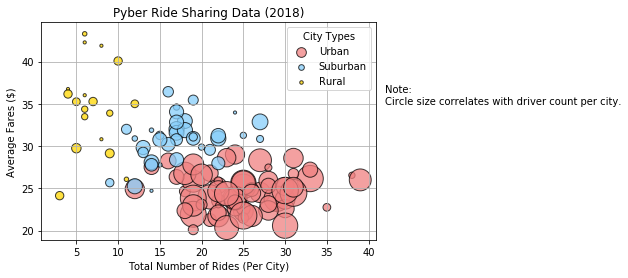

<Figure size 432x288 with 0 Axes>

In [25]:
# Obtain the x and y coordinates for each of the three city types
urban = city_info.loc[(city_info["Type of City"] == "Urban")]
suburban = city_info.loc[(city_info["Type of City"] == "Suburban")]
rural = city_info.loc[(city_info["Type of City"] == "Rural")]

avg_fare_urban = urban.groupby(['Type of City'])['Average Fare'].mean()
total_rides_urban = urban.groupby(['Type of City']).count()['Number of Rides']
total_drivers_urban = urban.groupby(['Type of City'])['Number of Drivers'].value_counts()

avg_fare_suburban = suburban.groupby(['Type of City'])['Average Fare'].mean()
total_rides_suburban = suburban.groupby(['Type of City']).count()['Number of Rides']
total_drivers_suburban = suburban.groupby(['Type of City'])['Number of Drivers'].value_counts()

avg_fare_rural = rural.groupby(['Type of City'])['Average Fare'].mean()
total_rides_rural = rural.groupby(['Type of City']).count()['Number of Rides']
total_drivers_rural = rural.groupby(['Type of City'])['Number of Drivers'].value_counts()

# num of drivers
driver_count = by_city.mean()['Driver Count']

#Color Scheme
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
city_color = {'Urban': color_scheme['Light Coral'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Gold']}

# Build the scatter plots for each city types
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")
plt.grid()
plt.legend(title = "City Types", loc="upper right", markerscale=.5,)
plt.text(42, 35,"Note:\nCircle size correlates with driver count per city.")



plt.show()

# Save Figure
plt.savefig("Pyber_Data_Scatter_Plot.png")

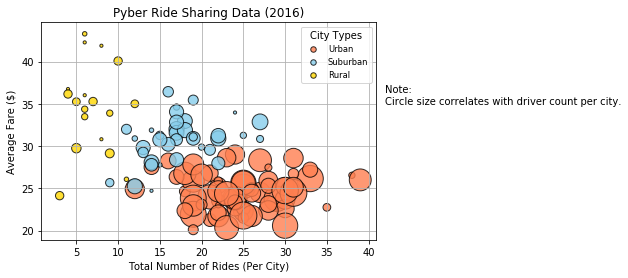

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

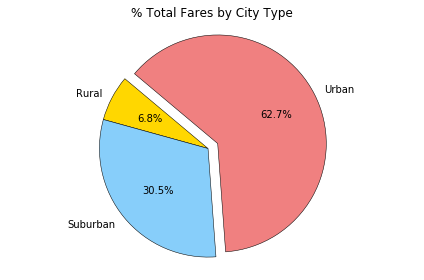

In [26]:
#group by type to be used by all pie charts
by_type = city_info.groupby('Type of City')['Type of City', 'Total Fares', 'Number of Rides', 'Number of Drivers']

# Calculate Type Percents
total_fares_by_city = city_info.groupby(['Type of City'])['Total Fares'].sum()

#labels = total_fares_by_city.index
labels = ["Rural","Suburban","Urban"]

#colors and exploe the same for all pie charts, reference here
colors = [city_color[n] for n in labels]
explode = [0 , 0, .1]
plt.pie(total_fares_by_city, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=140, wedgeprops = {'linewidth':.5,'edgecolor':'black'})
plt.title("% Total Fares by City Type")
plt.axis('equal')
plt.tight_layout()

# Save Figure
plt.savefig("Pct_Total_Fares_City_Type.png")

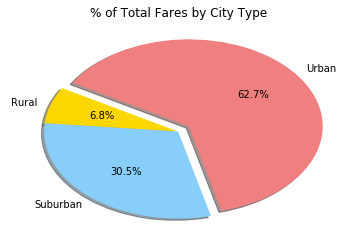

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

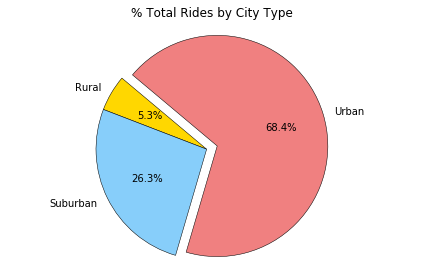

In [27]:
# Calculate Ride Percents
total_rides_by_city = city_info.groupby(['Type of City'])['Number of Rides'].sum()

#labels = total_fares_by_city.index
labels = ["Rural","Suburban","Urban"]

#colors and exploe the same for all pie charts, reference here
colors = [city_color[n] for n in labels]
explode = [0 , 0, .1]
plt.pie(total_rides_by_city, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=140, wedgeprops = {'linewidth':.5,'edgecolor':'black'})
plt.title("% Total Rides by City Type")
plt.axis('equal')
plt.tight_layout()

# Save Figure
plt.savefig("Pct_Total_Rides_City_Type.png")

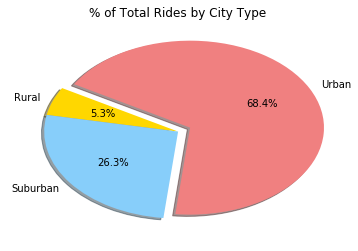

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

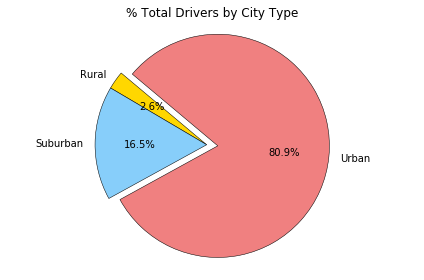

In [28]:
# Calculate Driver Percents
total_drivers_by_city = city_info.groupby(['Type of City'])['Number of Drivers'].sum()

labels = ["Rural","Suburban","Urban"]

#colors and exploe the same for all pie charts, reference here
colors = [city_color[n] for n in labels]
explode = [0 , 0, .1]
plt.pie(total_drivers_by_city, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=140, wedgeprops = {'linewidth':.5,'edgecolor':'black'})
plt.title("% Total Drivers by City Type")
plt.axis('equal')
plt.tight_layout()

# Save Figure
plt.savefig("Pct_Total_Drivers_City_Type.png")

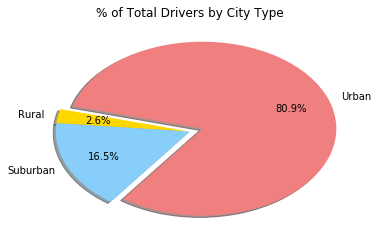

In [6]:
# Show Figure
plt.show()